In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '17330'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)


*** Entered Orchestrate Node ***

*** Entered Retrieve Node ***

Distance to neareast plan: 0.47105205059051514

*** Entered Modify Node ***

Modifying nearest plan with User input
1. Import the required pybaseball and matplotlib libraries.
2. Look up Shane Bieber's MLBAM ID using the playerid_lookup function.
3. Get Shane Bieber's 2020 statcast pitching data using the statcast_pitcher function. 
4. Filter the dataframe to only include walks.
5. Group the filtered data by 'game_date' and sum the number of walks for each game.
6. Sort the summed walks by 'game_date' in ascending order.
7. Calculate the cumulative sum of walks across the sorted game dates.
8. Create a line plot of the cumulative walks by game date using matplotlib.
9. Add titles and labels to the plot and display it.



*** Entered Orchestrate Node ***
Known plan. Executing with Sonnet

*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# Step 1: Import required libraries
import matplotlib.pyplot as plt
from pybaseball import playerid_lookup, statcast_pitcher

*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# Step 2: Look up Shane Bieber's player ID
bieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'].values[0]
print(f"Shane Bieber's player ID is: {bieber_id}")

Result:
Gathering player lookup table. This may take a moment.
Shane Bieber's player ID is: 669456


*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# Step 3: Get Bieber's 2020 statcast data
bieber_2020 = statcast_pitcher('2020-01-01', '2020-12-31', player_id=669456)

Result:
Gathering Player Data


*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# Step 4: Filter to only walks 
bieber_2020_walks = bieber_2020[bieber_2020['events']=='wal

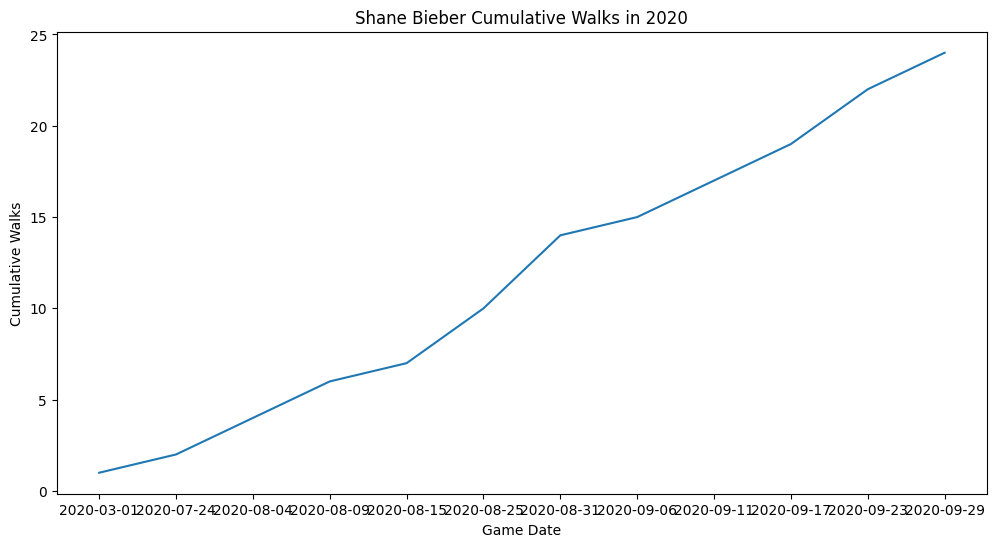


*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# Step 9: Describe results
print("The plot shows Shane Bieber's cumulative walk total over the course of the 2020 season. Each point represents a game, and the y-value is the total number of walks Bieber had issued up to that point in the season. You can see his walk total increasing from 0 at the start of the season up to his season-ending total.")

Result:
The plot shows Shane Bieber's cumulative walk total over the course of the 2020 season. Each point represents a game, and the y-value is the total number of walks Bieber had issued up to that point in the season. You can see his walk total increasing from 0 at the start of the season up to his season-ending total.


*** Entered Generate Node ***


*** Entered Summarize Node ***

The plot shows Shane Bieber's cumulative walk total over the course of the 2020 season. Each point represents a game, and the y-value is the total number of walks Bieber had issued u

In [6]:
task = "looks good"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [7]:
task = "yes, thanks"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)


*** Entered Orchestrate Node ***

*** Entered Memorize Node ***

Thank you, task has been commited to memory
